In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
df = pd.read_csv(r"D:\data collection\imartest\Linear Regression using Python\Fish_dataset.csv")

In [50]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [51]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [52]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [53]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Dataset does not have any null values

c:\users\dell\documents\sample_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

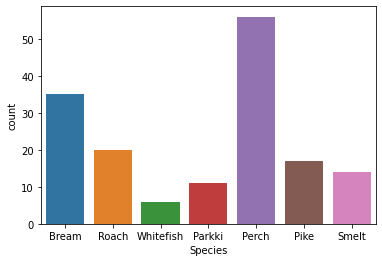

In [54]:
sns.countplot("Species" , data=df)

In [55]:
species = {'Perch': 1,
 'Bream': 2,
 'Roach': 3,
 'Pike': 4,
 'Smelt': 5,
 'Parkki': 6,
 'Whitefish': 7}

In [56]:
df["Species"] = df["Species"].map(species)

In [57]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,2,242.0,23.2,25.4,30.0,11.5200,4.0200
1,2,290.0,24.0,26.3,31.2,12.4800,4.3056
2,2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,2,363.0,26.3,29.0,33.5,12.7300,4.4555
4,2,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [58]:
df.corr()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.158034,-0.145808,-0.155201,-0.145122,-0.228222,-0.335190
Weight,-0.158034,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.145808,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.155201,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.145122,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.228222,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.335190,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


## Finding and removing outliers from dataset

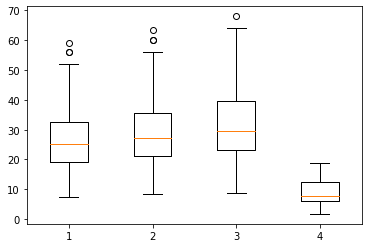

In [59]:
plt.boxplot((df["Length1"],df["Length2"],df["Length3"],df["Height"])  )
plt.show()

No handles with labels found to put in legend.


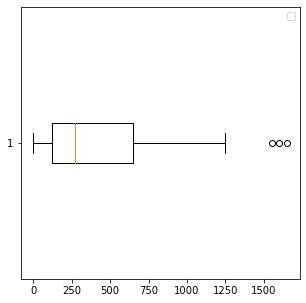

In [60]:
plt.figure(figsize = (5,5))
plt.boxplot((df["Weight"]) ,vert = False)
plt.legend()
plt.show()

In [61]:
print(np.where(df["Weight"]>1250))

(array([142, 143, 144], dtype=int64),)


Removing outliers in weight 

In [62]:
df = df.drop([142, 143, 144], axis = 0)

In [63]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,2,242.0,23.2,25.4,30.0,11.5200,4.0200
1,2,290.0,24.0,26.3,31.2,12.4800,4.3056
2,2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,2,363.0,26.3,29.0,33.5,12.7300,4.4555
4,2,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

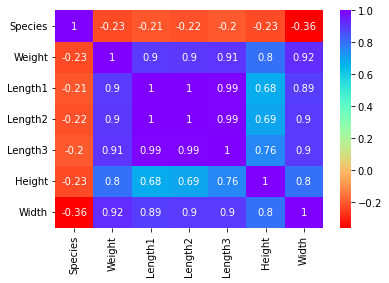

In [64]:
sns.set
sns.heatmap(df.corr() , annot = True , cmap = 'rainbow_r')

In [65]:
X = df.drop("Width" ,axis =1)
y = df["Width"]

In [66]:
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 

In [67]:
X_train , X_test , y_train ,y_test = train_test_split(X, y , test_size = 0.2)

In [68]:
linreg = LinearRegression()

In [69]:
linreg.fit(X_train ,y_train)

LinearRegression()

In [70]:
linreg.score(X_train ,y_train)

0.9268429360464063

In [71]:
y_preds=linreg.predict(X_test)

## Evaluation

In [72]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

0.3981933538512591

In [73]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.255962669949126

In [74]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_preds)
print(r2)

0.9175519953228022


In [75]:
print(f"r2_score is {r2}")
print(f"Mean absolute error is {round(mae,2)}")
print(f"Mean squared error is {round(mse,2)}")

r2_score is 0.9175519953228022
Mean absolute error is 0.4
Mean squared error is 0.26


In [76]:
rs = pd.DataFrame({"Actual":y_test , "predicted":y_preds})

In [77]:
rs

,Actual,predicted
118,7.3514,6.895806
127,7.5958,7.344347
56,4.2485,3.503146
57,4.6816,3.819278
32,6.7497,7.094860
55,4.2476,3.547978
12,4.3680,5.251502
75,2.6316,2.925818
126,8.1420,7.294421
102,5.1373,4.739266


c:\users\dell\documents\sample_project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\documents\sample_project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='predicted', ylabel='Density'>

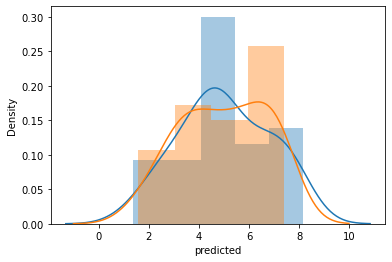

In [78]:
sns.distplot(rs["Actual"])
sns.distplot(rs["predicted"])